In [70]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import accuracy_score,classification_report


In [2]:
#Load the data
data = pd.read_csv("C:/Users/R I C H A R D/Desktop/python files/DS projects/ML Explain/archive(4)/heart_attack_china_youth_vs_adult.csv")
data.head()



,ID,Age,Gender,Heart_Attack,Blood_Pressure,Cholesterol,Diabetes,Smoking,Alcohol_Consumption,Exercise_Level,...,Medication,Hypertension,Heart_Rate,Physical_Activity_Hours,Dietary_Fiber_Intake,Sodium_Intake,Cultural_Background,Genetic_Risk_Score,Age_Group,Screen_Time
0,1,50,Female,No,147.978602,215.563010,No,No,Moderate,Low,...,No,No,59.022408,0.566953,37.073115,2278.711795,Han,0.874595,Adult,8.294082
1,2,40,Female,No,119.558478,210.308676,No,Yes,NaN,Low,...,No,No,76.564803,1.384155,35.724646,2284.789866,Han,0.643054,Adult,4.593150
2,3,26,Female,No,102.617993,241.415264,No,No,Heavy,Low,...,No,No,88.519388,0.279997,20.102873,2179.251493,Other,0.715595,Adult,5.310293
3,4,54,Male,No,121.465827,252.900145,No,No,Moderate,High,...,No,Yes,68.676712,1.841346,32.476741,3022.112596,Han,0.658501,Adult,4.087884
4,5,19,Female,No,130.216946,164.222684,No,Yes,Heavy,Low,...,No,No,62.504824,1.088681,22.075720,3634.690298,Han,0.102311,Adult,6.533303


In [3]:
data.isnull().sum()

ID                              0
Age                             0
Gender                          0
Heart_Attack                    0
Blood_Pressure                  0
Cholesterol                     0
Diabetes                        0
Smoking                         0
Alcohol_Consumption        134882
Exercise_Level                  0
BMI                             0
Family_History                  0
Diet_Type                       0
Stress_Level                    0
Residence                       0
Education_Level                 0
Employment_Status               0
Income_Level                    0
Marital_Status                  0
Sleep_Hours                     0
Medication                      0
Hypertension                    0
Heart_Rate                      0
Physical_Activity_Hours         0
Dietary_Fiber_Intake            0
Sodium_Intake                   0
Cultural_Background             0
Genetic_Risk_Score              0
Age_Group                       0
Screen_Time   

In [4]:
data["Alcohol_Consumption"].unique()

array(['Moderate', nan, 'Heavy'], dtype=object)

In [5]:
data['Alcohol_Consumption'].replace(np.nan,'No', inplace=True)
data.head()

C:\Users\R I C H A R D\AppData\Local\Temp\ipykernel_21272\1321814783.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Alcohol_Consumption'].replace(np.nan,'No', inplace=True)


,ID,Age,Gender,Heart_Attack,Blood_Pressure,Cholesterol,Diabetes,Smoking,Alcohol_Consumption,Exercise_Level,...,Medication,Hypertension,Heart_Rate,Physical_Activity_Hours,Dietary_Fiber_Intake,Sodium_Intake,Cultural_Background,Genetic_Risk_Score,Age_Group,Screen_Time
0,1,50,Female,No,147.978602,215.563010,No,No,Moderate,Low,...,No,No,59.022408,0.566953,37.073115,2278.711795,Han,0.874595,Adult,8.294082
1,2,40,Female,No,119.558478,210.308676,No,Yes,No,Low,...,No,No,76.564803,1.384155,35.724646,2284.789866,Han,0.643054,Adult,4.593150
2,3,26,Female,No,102.617993,241.415264,No,No,Heavy,Low,...,No,No,88.519388,0.279997,20.102873,2179.251493,Other,0.715595,Adult,5.310293
3,4,54,Male,No,121.465827,252.900145,No,No,Moderate,High,...,No,Yes,68.676712,1.841346,32.476741,3022.112596,Han,0.658501,Adult,4.087884
4,5,19,Female,No,130.216946,164.222684,No,Yes,Heavy,Low,...,No,No,62.504824,1.088681,22.075720,3634.690298,Han,0.102311,Adult,6.533303


In [6]:
numeric_col = data.select_dtypes(include=[np.number])
categorical = data.select_dtypes(include="object")

In [7]:
categorical.columns
for j in categorical.columns:
    print(data[j].value_counts(),"\n")

Gender
Female    129591
Male      129581
Other      10828
Name: count, dtype: int64 

Heart_Attack
No     238041
Yes     31959
Name: count, dtype: int64 

Diabetes
No     229461
Yes     40539
Name: count, dtype: int64 

Smoking
No     188792
Yes     81208
Name: count, dtype: int64 

Alcohol_Consumption
No          134882
Moderate    108097
Heavy        27021
Name: count, dtype: int64 

Exercise_Level
Moderate    135122
Low          80807
High         54071
Name: count, dtype: int64 

Family_History
No     202829
Yes     67171
Name: count, dtype: int64 

Diet_Type
Healthy      108123
Moderate     107760
Unhealthy     54117
Name: count, dtype: int64 

Residence
Urban    188637
Rural     81363
Name: count, dtype: int64 

Education_Level
Secondary    134853
Tertiary      80972
Primary       54175
Name: count, dtype: int64 

Employment_Status
Employed      189166
Student        53771
Unemployed     27063
Name: count, dtype: int64 

Marital_Status
Married     134948
Single      108068
Divorc

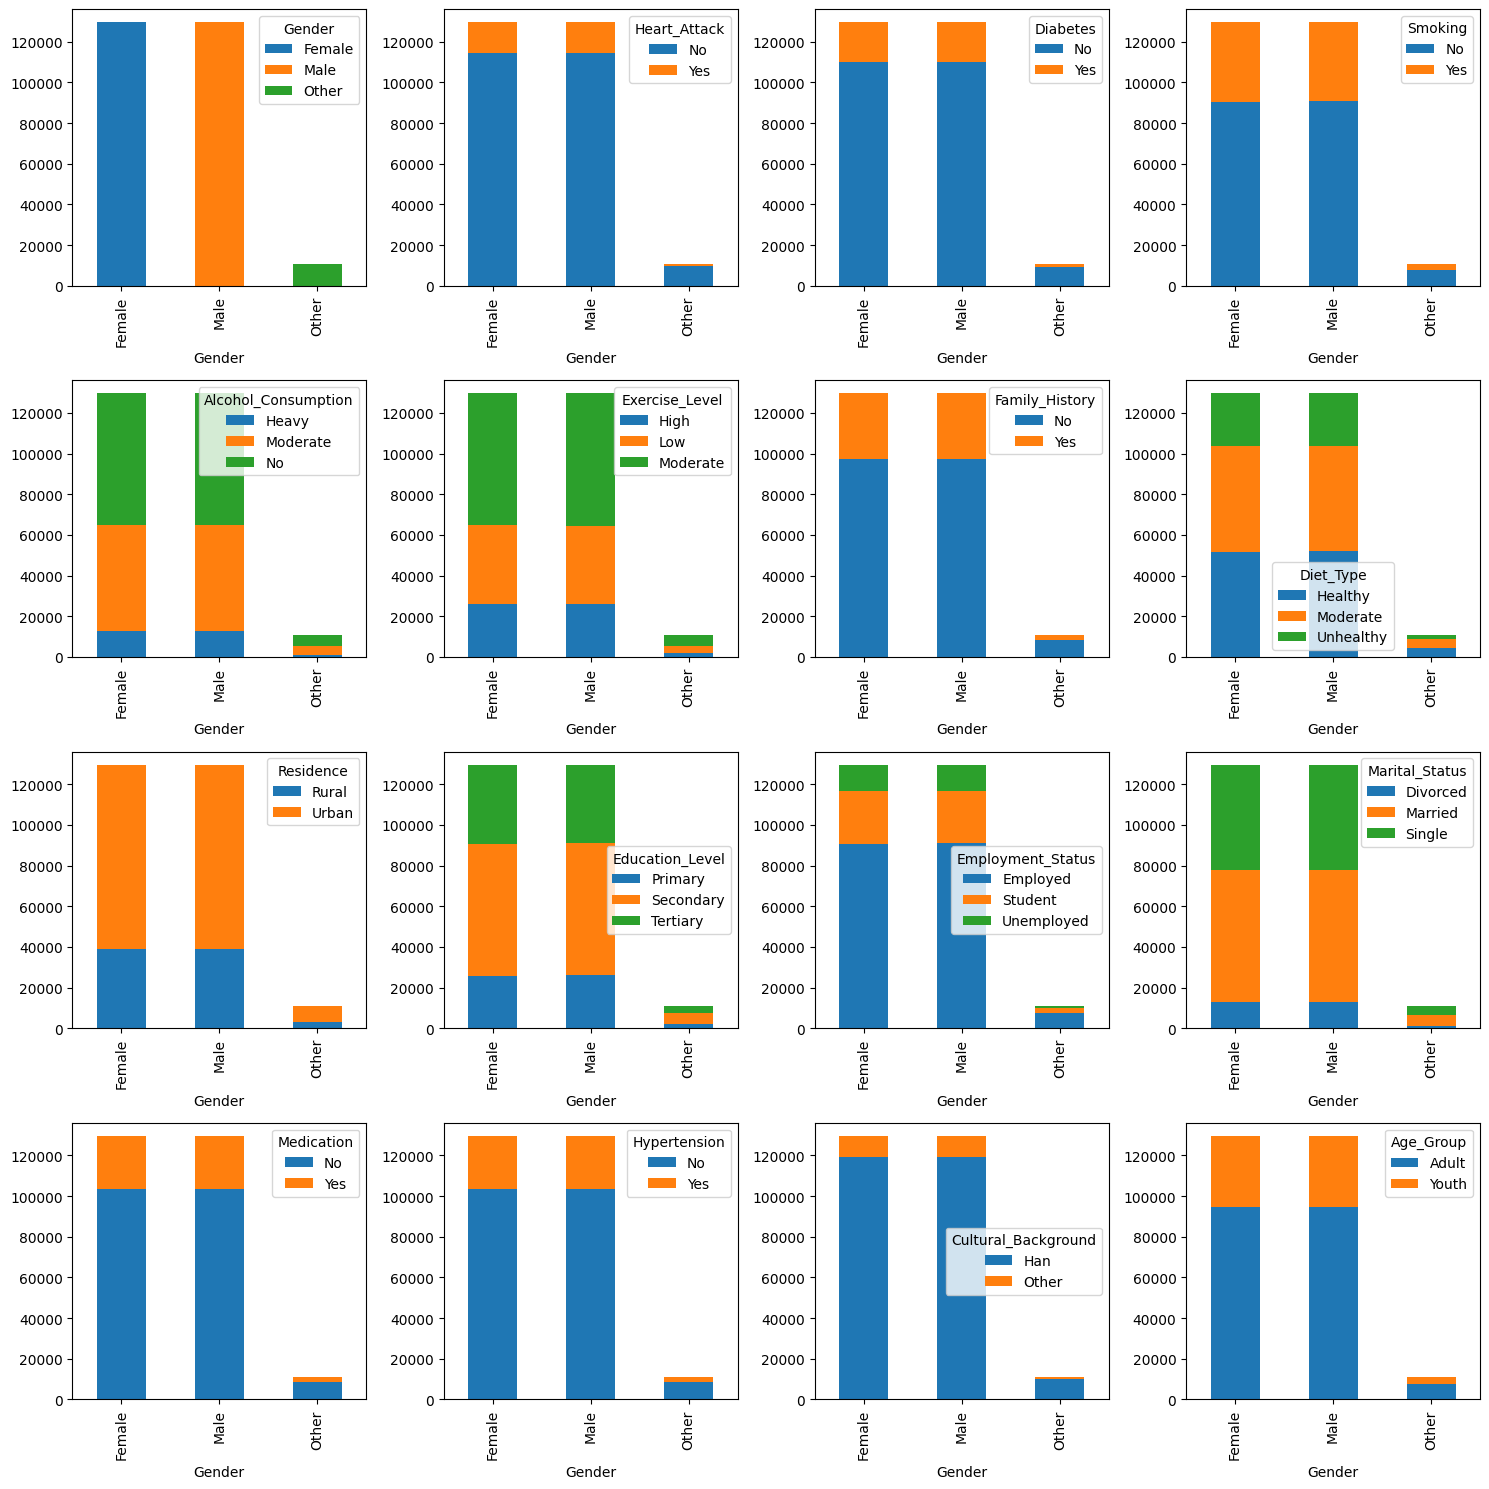

In [8]:
plt.figure(figsize=(15, 15))
for j, col in enumerate(categorical.columns):
    plt.subplot(4, 4, j+1)
    crosstab = pd.crosstab(data['Gender'], data[col])
    crosstab.plot(kind='bar', stacked=True, ax=plt.gca())
plt.tight_layout()
plt.show() 

In [9]:
data["Heart_Attack"].replace({'Yes':1,'No':0},inplace=True)
#data["Heart_Attack"] = (data["Heart_Attack"] == 'Yes').astype(int) 
y = data['Heart_Attack']
data.drop(columns=['Heart_Attack'],inplace=True)

C:\Users\R I C H A R D\AppData\Local\Temp\ipykernel_21272\1481893018.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["Heart_Attack"].replace({'Yes':1,'No':0},inplace=True)
C:\Users\R I C H A R D\AppData\Local\Temp\ipykernel_21272\1481893018.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


In [10]:
categorical.drop(columns=["Heart_Attack"],inplace=True)


In [11]:
dummies_list = []
for column in categorical:
    dummies = pd.get_dummies(data[column], drop_first=True)
    dummies_list.append(dummies)

In [12]:
data = pd.concat([data] + dummies_list, axis=1)

In [13]:
data.drop(columns=categorical, inplace=True)

In [14]:
data.shape

(270000, 36)

In [15]:
print(numeric_col.columns)

Index(['ID', 'Age', 'Blood_Pressure', 'Cholesterol', 'BMI', 'Stress_Level',
       'Income_Level', 'Sleep_Hours', 'Heart_Rate', 'Physical_Activity_Hours',
       'Dietary_Fiber_Intake', 'Sodium_Intake', 'Genetic_Risk_Score',
       'Screen_Time'],
      dtype='object')


In [16]:
#Dropping The ID Column
data.drop(columns=['ID'], inplace=True)

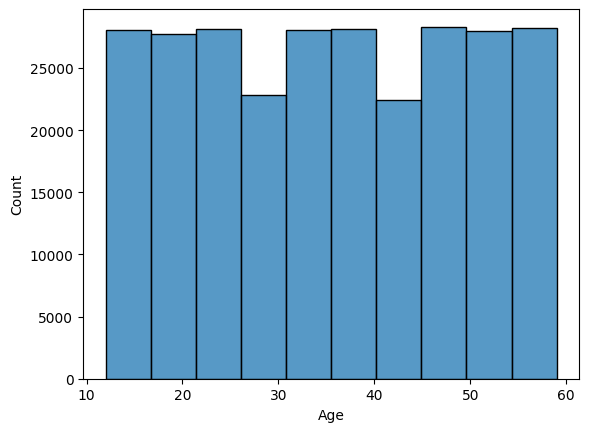

In [17]:
sns.histplot(data["Age"], bins=10)  # Directly passing the column
plt.show()

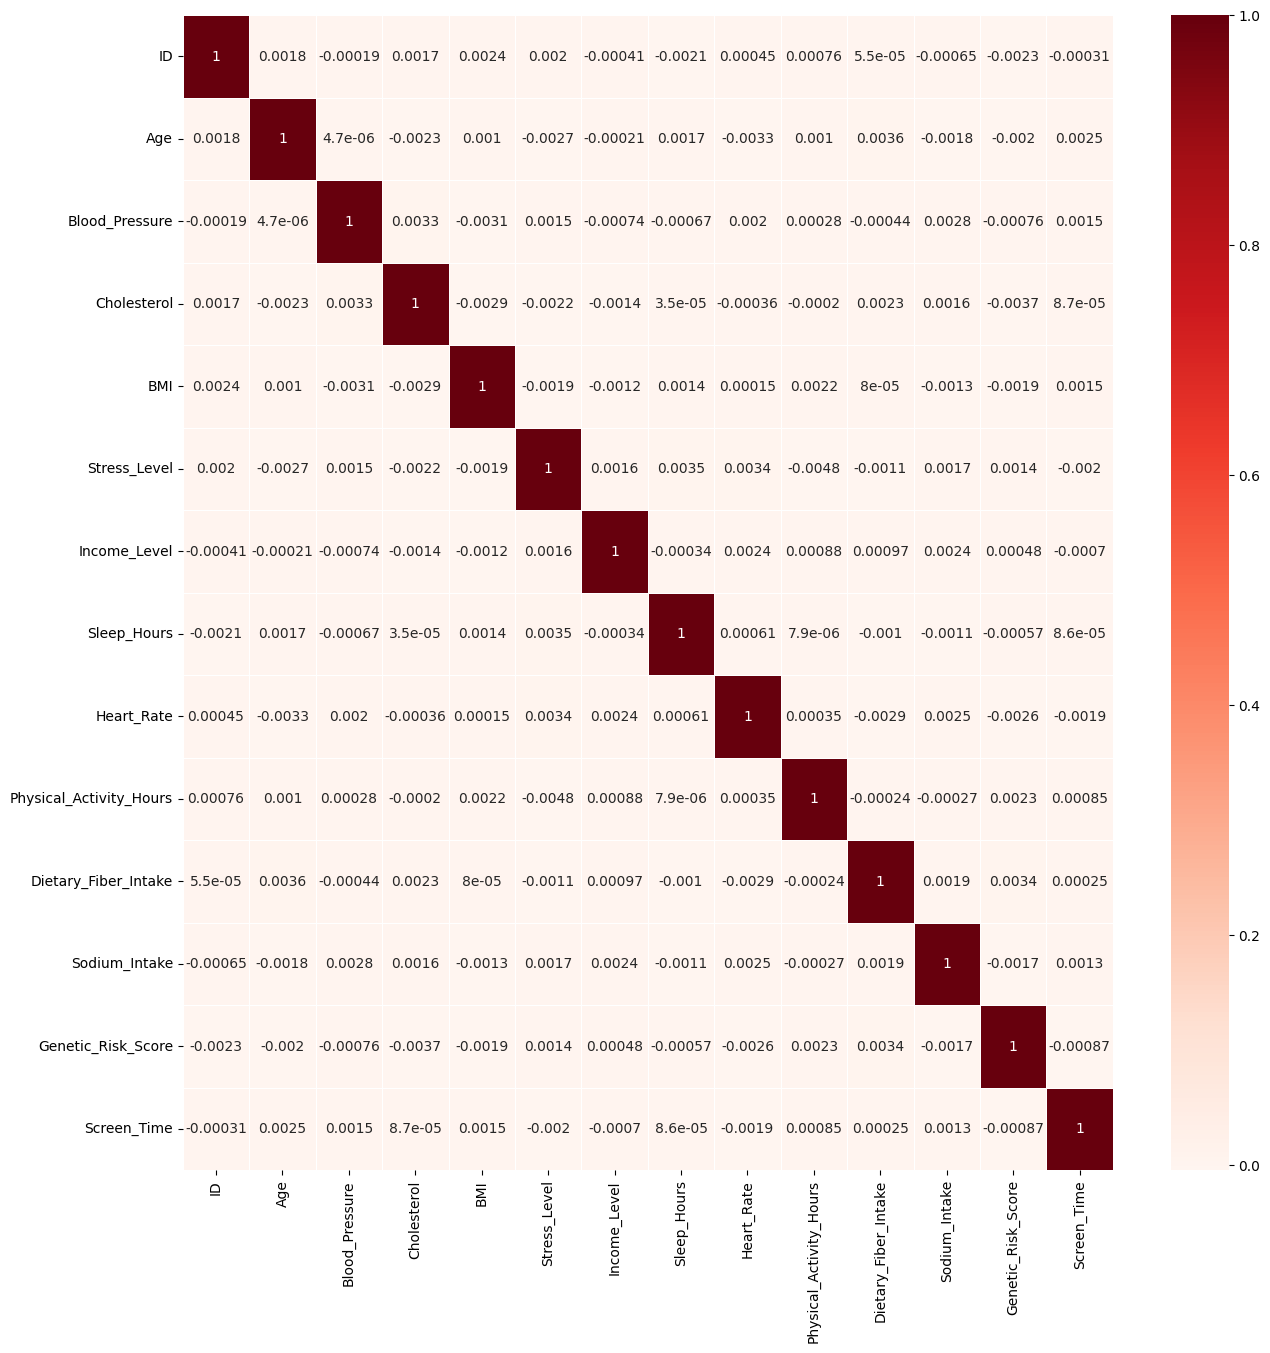

In [18]:
plt.figure(figsize=(15,15))
sns.heatmap(numeric_col.corr(),annot=True, cmap='Reds', linewidths=0.5)
plt.show()

In [19]:
numeric_col.drop(columns=["ID"],inplace=True)

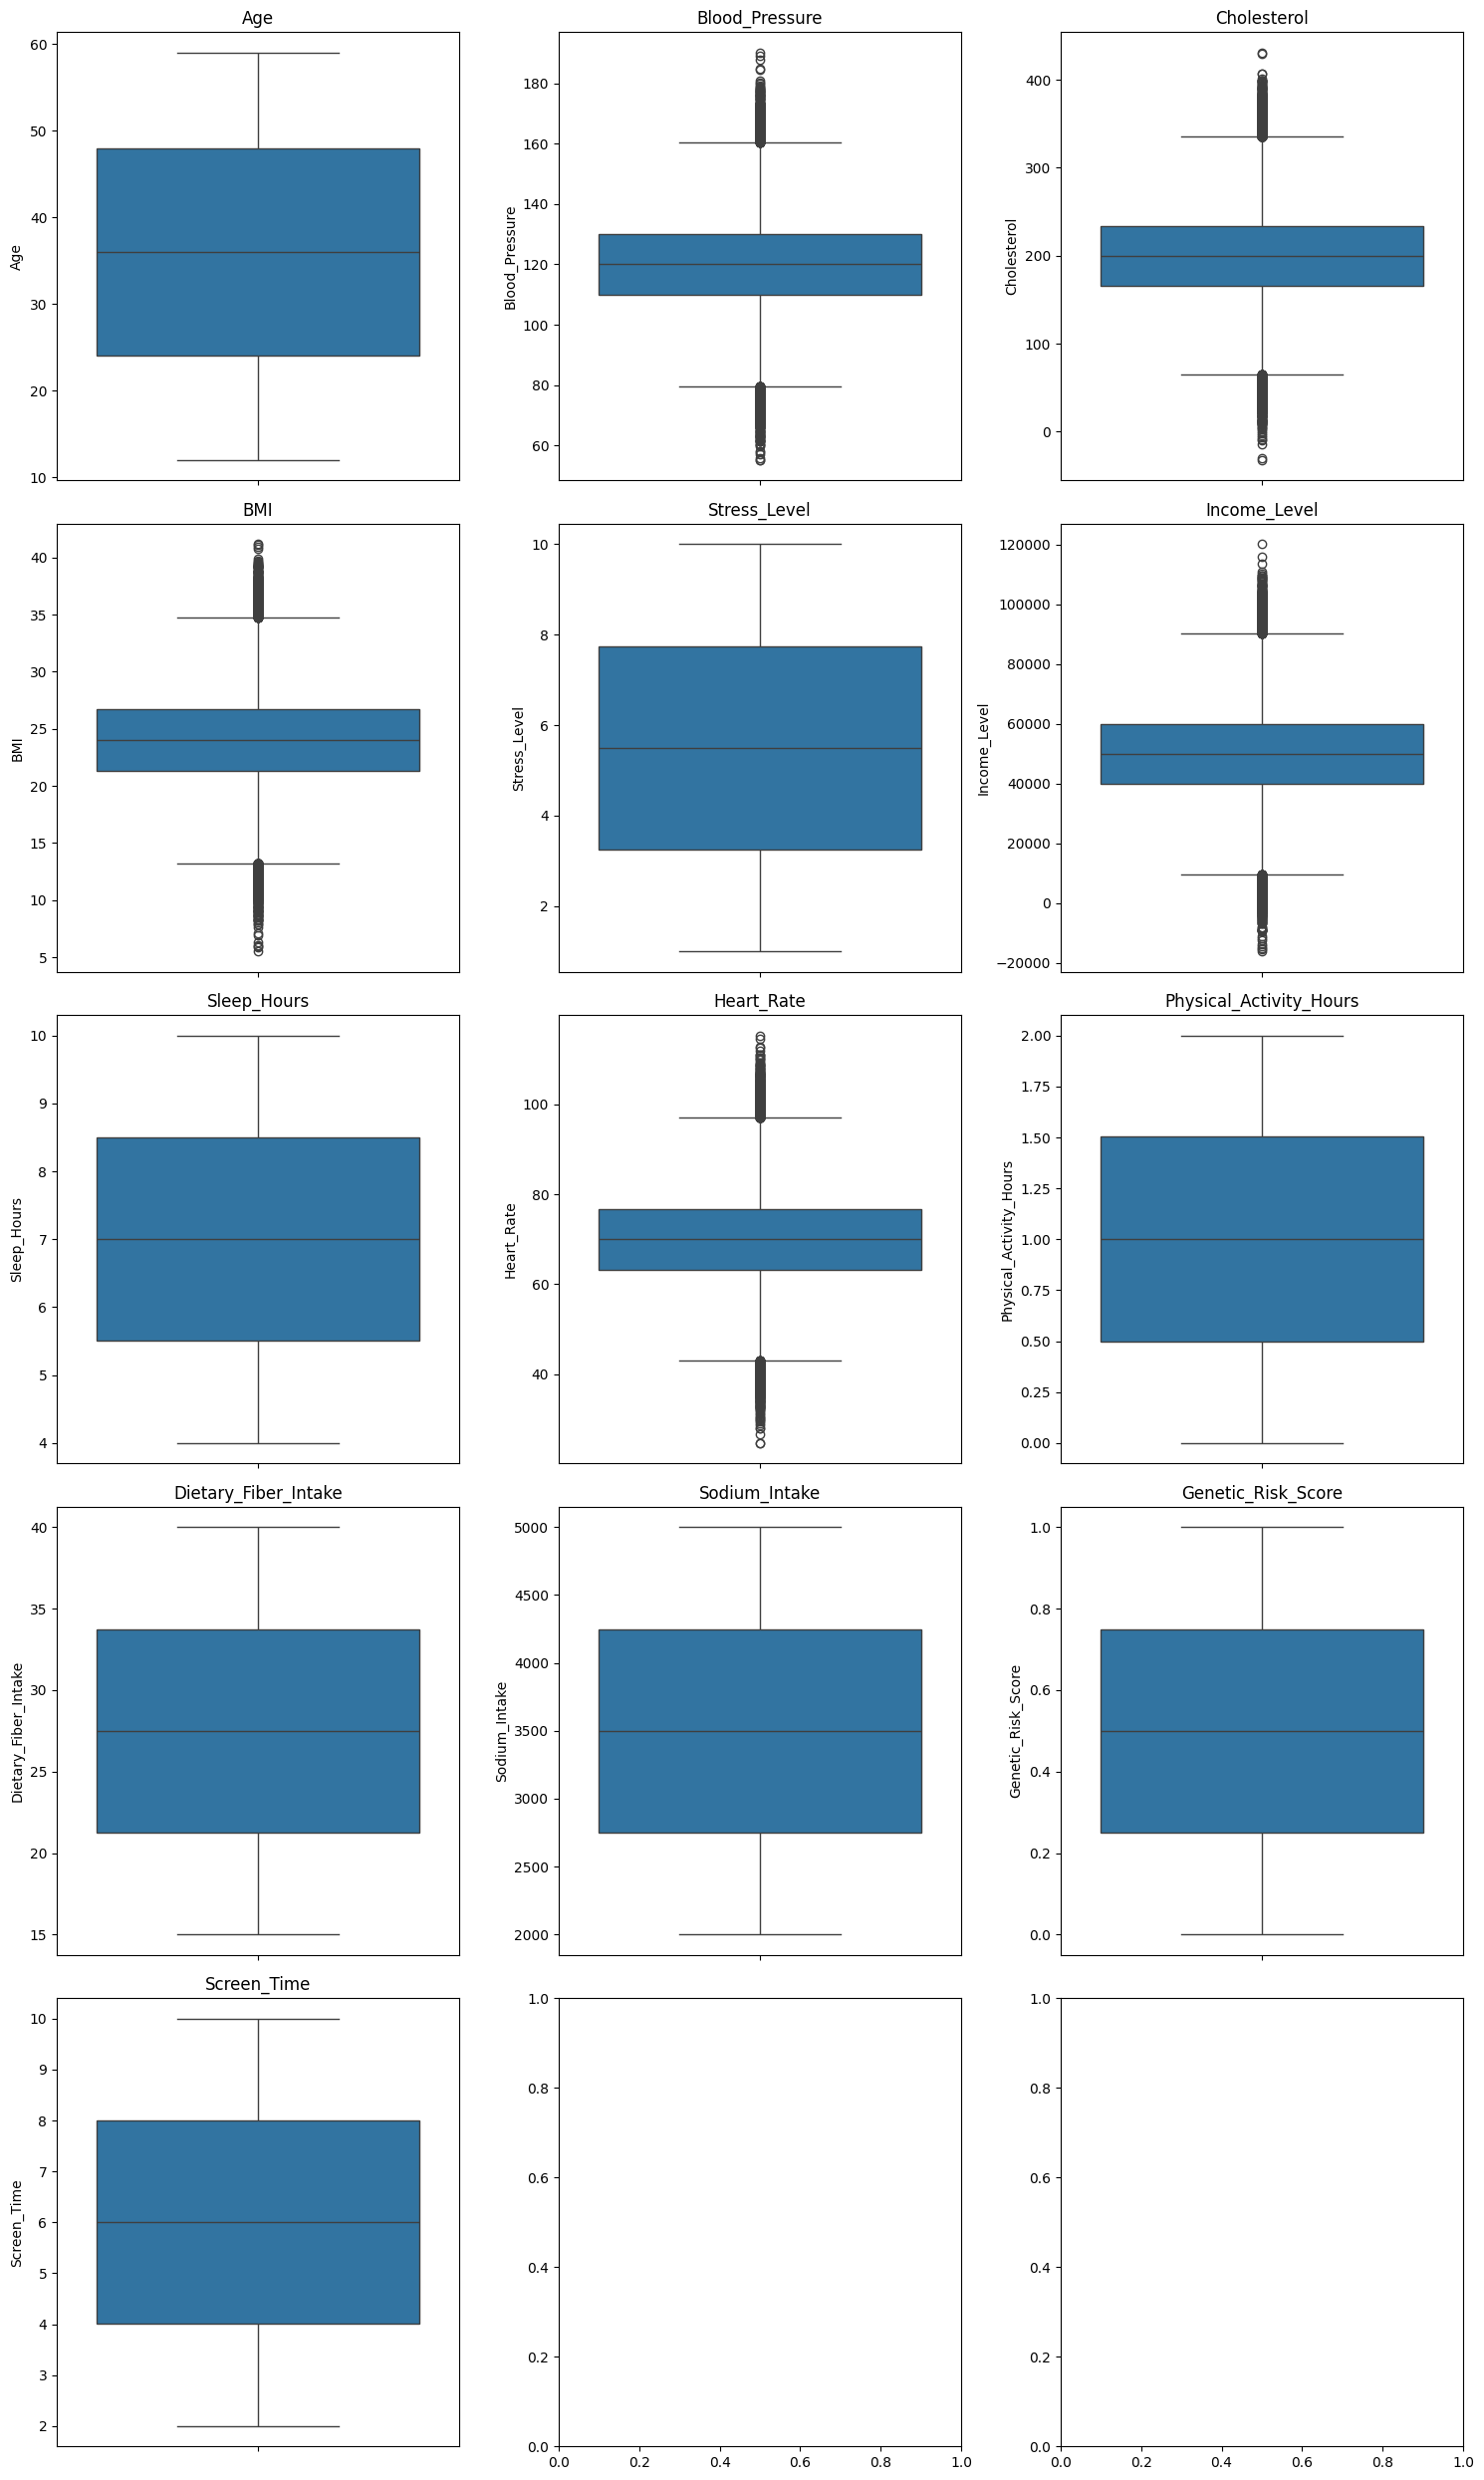

In [20]:

fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(15, 25))
axes = axes.flatten()
for i, col in enumerate(numeric_col.columns):
    sns.boxplot(y=numeric_col[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()




In [21]:
Q1 = numeric_col.quantile(0.25)
Q3 = numeric_col.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [22]:
#Median
median_value = np.median(numeric_col)
#Filter outliers and replace them with the median
numeric_col[(numeric_col < lower_bound) | (numeric_col > upper_bound)] = median_value

In [23]:
scaler = StandardScaler()# Create an instance of StandardScaler
scal_numeric = pd.DataFrame(scaler.fit_transform(numeric_col), columns=numeric_col.columns)

In [24]:
data.columns

Index(['Age', 'Blood_Pressure', 'Cholesterol', 'BMI', 'Stress_Level',
       'Income_Level', 'Sleep_Hours', 'Heart_Rate', 'Physical_Activity_Hours',
       'Dietary_Fiber_Intake', 'Sodium_Intake', 'Genetic_Risk_Score',
       'Screen_Time', 'Male', 'Other', 'Yes', 'Yes', 'Moderate', 'No', 'Low',
       'Moderate', 'Yes', 'Moderate', 'Unhealthy', 'Urban', 'Secondary',
       'Tertiary', 'Student', 'Unemployed', 'Married', 'Single', 'Yes', 'Yes',
       'Other', 'Youth'],
      dtype='object')

In [25]:
# Drop original numeric columns and replace them with standardized ones
data = data.drop(columns=numeric_col.columns).join(scal_numeric)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270000 entries, 0 to 269999
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Male                     270000 non-null  bool   
 1   Other                    270000 non-null  bool   
 2   Yes                      270000 non-null  bool   
 3   Yes                      270000 non-null  bool   
 4   Moderate                 270000 non-null  bool   
 5   No                       270000 non-null  bool   
 6   Low                      270000 non-null  bool   
 7   Moderate                 270000 non-null  bool   
 8   Yes                      270000 non-null  bool   
 9   Moderate                 270000 non-null  bool   
 10  Unhealthy                270000 non-null  bool   
 11  Urban                    270000 non-null  bool   
 12  Secondary                270000 non-null  bool   
 13  Tertiary                 270000 non-null  bool   
 14  Stud

In [26]:
bool_columns = data.dtypes[data.dtypes == bool].index.tolist()
#bool_columns = data.select_dtypes(include='bool').columns

In [27]:
for i in bool_columns:
    data[i] = data[i].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270000 entries, 0 to 269999
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Male                     270000 non-null  int32  
 1   Other                    270000 non-null  int32  
 2   Yes                      270000 non-null  int32  
 3   Yes                      270000 non-null  int32  
 4   Moderate                 270000 non-null  int32  
 5   No                       270000 non-null  int32  
 6   Low                      270000 non-null  int32  
 7   Moderate                 270000 non-null  int32  
 8   Yes                      270000 non-null  int32  
 9   Moderate                 270000 non-null  int32  
 10  Unhealthy                270000 non-null  int32  
 11  Urban                    270000 non-null  int32  
 12  Secondary                270000 non-null  int32  
 13  Tertiary                 270000 non-null  int32  
 14  Stud

Train Test Split

In [28]:
x_train,x_test,y_train,y_test = train_test_split(data,y,test_size=0.2,random_state=42)
#x_train.shape returns the shape of the array as a tuple (num_samples, num_features).
#x_train.shape[1] extracts the second element of the tuple, which is the number of features (columns) in the input data.
input_dim = x_train.shape[1]

In [29]:
model = Sequential()


In [34]:
model.add(Dense(256,activation='relu',input_dim=input_dim))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(1,activation='sigmoid'))

c:\Users\R I C H A R D\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [36]:
history = model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=64
)

Epoch 1/100
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8114 - loss: 0.4782 - val_accuracy: 0.8839 - val_loss: 0.3599
Epoch 2/100
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8828 - loss: 0.3665 - val_accuracy: 0.8839 - val_loss: 0.3604
Epoch 3/100
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8788 - loss: 0.3714 - val_accuracy: 0.8839 - val_loss: 0.3593
Epoch 4/100
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8819 - loss: 0.3644 - val_accuracy: 0.8839 - val_loss: 0.3595
Epoch 5/100
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8810 - loss: 0.3659 - val_accuracy: 0.8839 - val_loss: 0.3595
Epoch 6/100
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8818 - loss: 0.3641 - val_accuracy: 0.8839 - val_loss: 0.3592
Epoch 7/100
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8809 - loss: 0.3655 - val_accuracy: 0.8839 - val_loss: 0.3594
Epoch 8/100
2700/2700 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8811 - loss: 

In [56]:
Classifier = RandomForestClassifier(max_depth= 20, n_estimators= 200, random_state=42)

In [57]:
#Train model on the data
Classifier.fit(x_train,y_train)

RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

In [58]:
Classifier.score(x_test,y_test),Classifier.score(x_train,y_train)

(0.880962962962963, 0.8821296296296296)

In [59]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

Test Loss: 0.3937
Test Accuracy: 0.8787


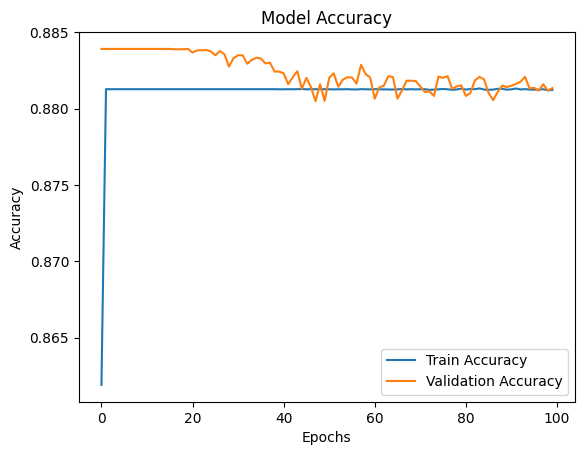

In [60]:
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

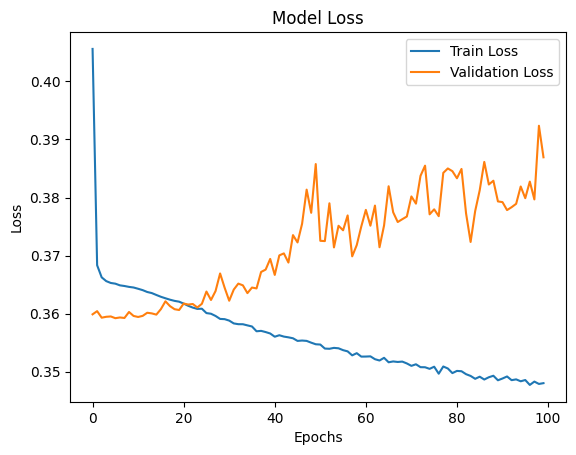

In [61]:
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Model Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [77]:
# Predict probabilities
y_pred = model.predict(x_test)

1688/1688 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [78]:
# Threshold probabilities to get binary labels
y_pred_labels = (y_pred > 0.5).astype(int)

In [79]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred_labels))
print("Classification Report:\n", classification_report(y_test, y_pred_labels))

Accuracy: 0.8786666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.88      1.00      0.94     47572
           1       0.10      0.00      0.00      6428

    accuracy                           0.88     54000
   macro avg       0.49      0.50      0.47     54000
weighted avg       0.79      0.88      0.82     54000

